#### Import Numpy - Pandas - Matplotlib

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
np.version.version

'1.23.5'

In [4]:
pd.__version__

'1.5.2'

#### Leggere il CSV dal DataSet (csv) originale

In [5]:
df = pd.read_csv('CSV/pokedex_(Update_05.20).csv', index_col=0)

#### Mostrare il DataSet appena importato

In [6]:
df

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,NaN,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,Steel,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,NaN,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


#### Selezionare ed eliminare le colonne che NON volgio avere nel mio DataSet

In [7]:
col_names = [
    'pokedex_number', 'name', 'generation',
    'status', 'type_number', 'type_1',
    'type_2', 'height_m', 'weight_kg',
    'abilities_number', 'ability_1', 'ability_2',
    'ability_hidden', 'total_points', 'hp',
    'attack', 'defense', 'sp_attack',
    'sp_defense', 'speed', 'catch_rate',
    'base_experience', 'percentage_male'
]

In [8]:
filtered_pokemon_data = pd.DataFrame(df, columns=col_names)

In [9]:
filtered_pokemon_data

,pokedex_number,name,generation,status,type_number,type_1,type_2,height_m,weight_kg,abilities_number,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male
0,1,Bulbasaur,1,Normal,2,Grass,Poison,0.7,6.9,2,...,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,64.0,87.5
1,2,Ivysaur,1,Normal,2,Grass,Poison,1.0,13.0,2,...,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,142.0,87.5
2,3,Venusaur,1,Normal,2,Grass,Poison,2.0,100.0,2,...,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,236.0,87.5
3,3,Mega Venusaur,1,Normal,2,Grass,Poison,2.4,155.5,1,...,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,281.0,87.5
4,4,Charmander,1,Normal,1,Fire,NaN,0.6,8.5,2,...,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,62.0,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,8,Legendary,1,Fairy,NaN,2.8,110.0,1,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1024,889,Zamazenta Crowned Shield,8,Legendary,2,Fighting,Steel,2.9,785.0,1,...,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN
1025,889,Zamazenta Hero of Many Battles,8,Legendary,1,Fighting,NaN,2.9,210.0,1,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1026,890,Eternatus,8,Legendary,2,Poison,Dragon,20.0,950.0,1,...,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN


#### Aggiungo una colonna con gli anni in relazione alla generazione 
- La prima uscii nel 1996
- La secona uscii nel 1999
- La terza uscii nel 2002
- La quarta uscii nel 2006
- La quinta uscii nel 2010
- La sesta uscii nel 2013
- La settima uscii nel 2016
- L' ottava uscii nel 2019

##### Prendo da un altro DataSet UNA colonna che mi interessa
##### Unisco i due DataSet in uno nuovo esportato in CSV

In [10]:
# Linking genreration number to publish date (JP)
years = [1996, 1999, 2002, 2006, 2010, 2013, 2016, 2019]

# inserisco la colonna (sarà la 3°) che si chiamerà date_published passandoli come valore il mapping dato dal
# dizionario creato con enumerate (con lista di anni e index)
filtered_pokemon_data.insert(2, column='date_published', value=filtered_pokemon_data.generation.map(dict(enumerate(years, start=1))))

df_2 = pd.read_csv('CSV/All_Pokemon.csv', index_col=0)
df_2.reset_index(inplace=True)
df_3 = pd.DataFrame(df_2['Experience to level 100'])
filtered_pokemon_data = pd.merge(filtered_pokemon_data, df_3, left_on=filtered_pokemon_data.index, right_index=True)


# filtered_pokemon_data
# filtered_pokemon_data.insert(22, column='experience_to_100', value=experience_to_100[''])

filtered_pokemon_data.to_csv('CSV/filtered_pokemon_data_years.csv', index=False)



# filtered_pokemon_data

#### sostituisci counter
#### Rappresentazione con grafico a barre di quanti Pokémon sono stati rilasciati per ogni generazione

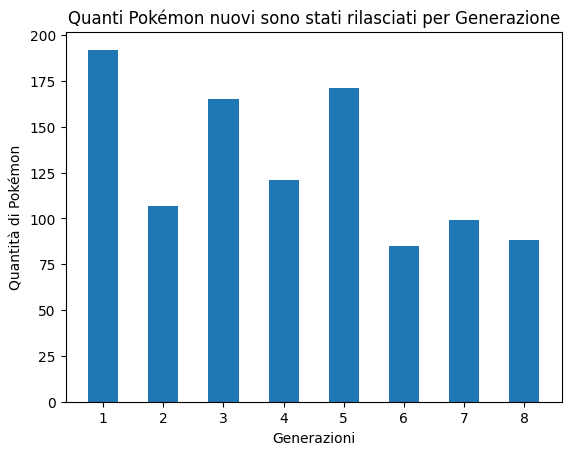

In [11]:
# vogliamo rappresentare quanti Pokémon sono stati rilasciati per ogni generazione, in questo caso 8,
from collections import Counter

generations = filtered_pokemon_data.generation.values.tolist()
generations = Counter(generations)
plt.title("Quanti Pokémon nuovi sono stati rilasciati per Generazione")
plt.xlabel('Generazioni')
plt.ylabel('Quantità di Pokémon')
plt.bar(generations.keys(), generations.values(), width=0.5,)
plt.show()

#### Grafico che mostra quante aggiunte di nuovi Pokémon ci sono state in ogni generazione (il punto 0 è 192 Pokémon della gen 1)
#### RIFINIRE LA LABLE (QUESTO GRAFICO NON VUOL DIRE UN CAZZO)

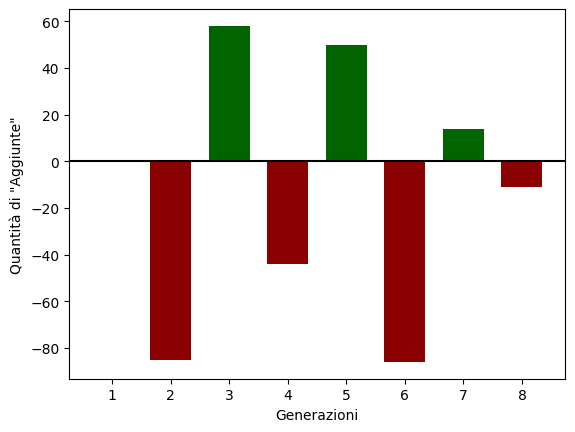

In [12]:
pippo_franco = list(generations.values())
pippo_franco.insert(0, pippo_franco[0])

result = [y - x for x, y in zip(pippo_franco, pippo_franco[1:])]


colors =[]
[colors.append('darkgreen') if r > 0 else colors.append('darkred') for r in result]

plt.bar(generations.keys(), result, width=0.7, color=colors)
plt.axhline(y=0, color='black')
plt.xlabel("Generazioni")
plt.ylabel('Quantità di "Aggiunte"')
plt.show()

# si evince come nelle genereazioni "dispari", prendendo come punto 0 il numero di Pokémon
# della generazione 1, si abbia un maggior incremento di Pokémon rispetto alle generazioni "pari"

In [13]:
generations

Counter({1: 192, 2: 107, 3: 165, 4: 121, 5: 171, 6: 85, 7: 99, 8: 88})

#### Mettiamo a confronto l'incremento generazionale di Pokémon con quanti sono stati effettivamente aggiunti per generazione

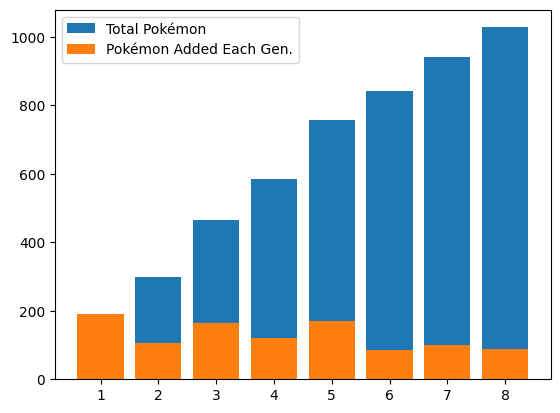

In [14]:
# Mettiamo a confronto l'incremento generazionale di Pokémon con quanti sono stati effettivamente
# aggiunti per generazione

pkmn_x_generation = pd.Series(generations.values())

total_pkmn_gen_to_gen = [pd.Series(list(generations.values())[:i]).sum() for i in generations.keys()]

plt.bar(generations.keys(),total_pkmn_gen_to_gen)
plt.bar(generations.keys(), generations.values())
plt.legend(['Total Pokémon', 'Pokémon Added Each Gen.'])
plt.show()

In [15]:
filtered_pokemon_data

,key_0,pokedex_number,name,date_published,generation,status,type_number,type_1,type_2,height_m,...,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male,Experience to level 100
0,0,1,Bulbasaur,1996,1,Normal,2,Grass,Poison,0.7,...,45.0,49.0,49.0,65.0,65.0,45.0,45.0,64.0,87.5,1059860
1,1,2,Ivysaur,1996,1,Normal,2,Grass,Poison,1.0,...,60.0,62.0,63.0,80.0,80.0,60.0,45.0,142.0,87.5,1059860
2,2,3,Venusaur,1996,1,Normal,2,Grass,Poison,2.0,...,80.0,82.0,83.0,100.0,100.0,80.0,45.0,236.0,87.5,1059860
3,3,3,Mega Venusaur,1996,1,Normal,2,Grass,Poison,2.4,...,80.0,100.0,123.0,122.0,120.0,80.0,45.0,281.0,87.5,1059860
4,4,4,Charmander,1996,1,Normal,1,Fire,NaN,0.6,...,39.0,52.0,43.0,60.0,50.0,65.0,45.0,62.0,87.5,1059860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1023,888,Zacian Hero of Many Battles,2019,8,Legendary,1,Fairy,NaN,2.8,...,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,1250000
1024,1024,889,Zamazenta Crowned Shield,2019,8,Legendary,2,Fighting,Steel,2.9,...,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN,1250000
1025,1025,889,Zamazenta Hero of Many Battles,2019,8,Legendary,1,Fighting,NaN,2.9,...,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,1250000
1026,1026,890,Eternatus,2019,8,Legendary,2,Poison,Dragon,20.0,...,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,1250000


#### Ricerchiamo qual è il Tipo Primario più comune tra:
- Normale
- Volante
- Elettro
- Fuoco
- Acqua
- Erba
- Lotta
- Veleno
- Spettro
- Roccia
- Terra
- Coleottero
- Psico
- Acciaio
- Ghiaccio
- Buio
- Drago

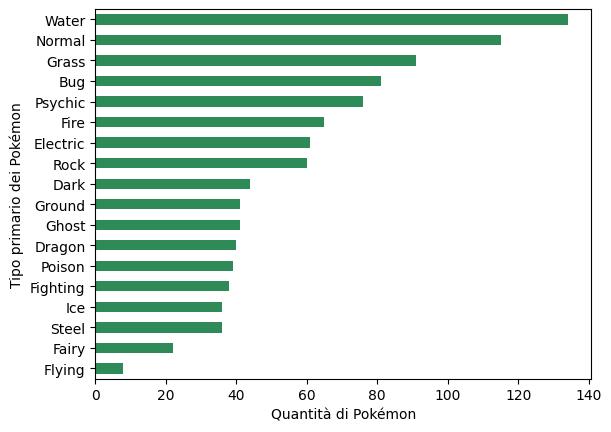

In [16]:
pokemon_for_type = filtered_pokemon_data.groupby("type_1")["name"].count()
pokemon_for_type_sorted = pokemon_for_type.sort_values(ascending=True).plot(kind="barh", color= 'seagreen')

plt.ylabel('Tipo primario dei Pokémon')
plt.xlabel('Quantità di Pokémon')

plt.show()

# Si evince come il tipo dominante di pokemon è il tipo Acqua, per un team ottimale, avere un tipo "Elettro", 
# in media aumenta la probabilità di vincere 

#### Ricerchiamo qual è il Tipo Secondario più comune tra:
- Normale
- Volante
- Elettro
- Fuoco
- Acqua
- Erba
- Lotta
- Veleno
- Spettro
- Roccia
- Terra
- Coleottero
- Psico
- Acciaio
- Ghiaccio
- Buio
- Drago

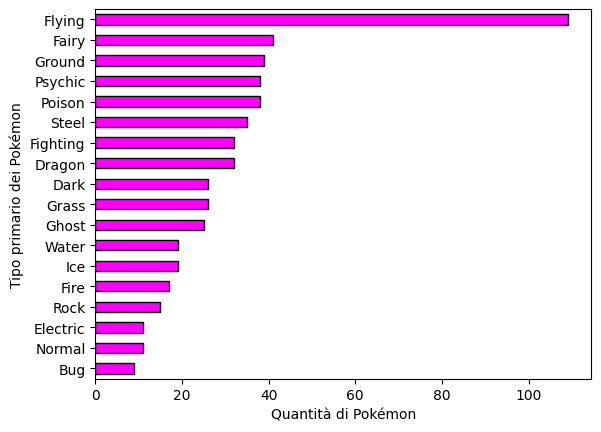

In [17]:
pokemon_for_type_2 = filtered_pokemon_data.groupby("type_2")['name'].count()
pokemon_for_type_2_sorted = pokemon_for_type_2.sort_values(ascending=True).plot(kind="barh", color='fuchsia', edgecolor='black')

plt.ylabel('Tipo primario dei Pokémon')
plt.xlabel('Quantità di Pokémon')

plt.show()

# il tipo secondario più comune è il tipo volante, che tra l'altro è il tipo primario meno diffuso

#### Ricerchiamo il Pokémon più leggero
##### Il peso minimo imposto da The Poekomon Company in KG è 0.1kg 

In [18]:
# get lightest
lightest = filtered_pokemon_data[['name', 'weight_kg']].sort_values(by = ['weight_kg'], ascending=True)

series1 = pd.DataFrame(
    {'Pokémon': lightest['name'], 'Peso KG': lightest['weight_kg'].values})
# only_lightest = series1[series1['Peso KG'] < 0.2]
only_lightest = series1[:1]
only_lightest

# ci sono 5 Pokémon che pesano 0.1 (valore minimo nel "mondo" Pokémon)
# Prendo il primo tramite sliceing

,Pokémon,Peso KG
776,Flabébé,0.1


#### Ricerchiamo il Pokémon più pesante
##### Il peso massimo imposto da The Pokémon Company in KG è 999.9kg 

In [19]:
# get the heaviest
heaviest = filtered_pokemon_data[['name', 'weight_kg']].sort_values(by = ['weight_kg'], ascending=False)

series2 = pd.DataFrame(
    {'Pokémon': heaviest['name'], 'Peso KG': heaviest['weight_kg'].values})
# only_heaviest = series2[series2['Peso KG'] > 999.8]
only_heaviest = series2[:1]
only_heaviest

# Ci sono 2 Pokémon che pesano 999.9 (valore massimo nel "mondo" Pokémon)
# Prendo il primo tramite sliceing

,Pokémon,Peso KG
924,Celesteela,999.9


#### Rierchiamo il Pokémon più veloce

In [20]:
# get the fastest
fastest = filtered_pokemon_data[['name', 'speed']].sort_values(by = ['speed'], ascending=False)
series3 = pd.DataFrame(
    {'Pokémon': fastest['name'], 'Velocità': fastest['speed'].values})
only_fastest = series3[:1]
only_fastest

,Pokémon,Velocità
463,Deoxys Speed Forme,180.0


#### Ricerchiamo il Pokémon più alto
##### L'altezza massima imposta da The Pokémon Company in m è 100.00m 

In [21]:
# get the tallest
tallest = filtered_pokemon_data[['name', 'height_m']].sort_values(by = ['height_m'], ascending=False)
series4 = pd.DataFrame(
    {'Pokémon': tallest['name'], 'Altezza in m': tallest['height_m'].values})
# only_tallest = series4[series4['height_m'] > 99.9]
only_tallest = series4[:1]
only_tallest

,Pokémon,Altezza in m
1027,Eternatus Eternamax,100.0


#### Ricerchiamo il Pokémon più basso
##### L'altezza minima imposta da The Pokémon Company in m è 0.1m 

In [22]:
# get the smallest
smallest = filtered_pokemon_data[['name', 'height_m']].sort_values(by = ['height_m'], ascending=True)
series5 = pd.DataFrame(
    {'Pokémon': smallest['name'], 'Altezza in m': smallest['height_m'].values})
# only_smallest = series5[series5['height_m'] < 0.2]
only_smallest = series5[:1]
only_smallest

# ci sono 6 Pokémon che hanno la stessa altezza (0.1 valore minimo nel "mondo" Pokémon
# prendo il primo tramite sliceing

,Pokémon,Altezza in m
864,Cutiefly,0.1


1     [780.0, 195.0]
2     [700.0, 180.0]
3     [780.0, 190.0]
4     [720.0, 194.0]
5     [700.0, 255.0]
6     [708.0, 200.0]
7     [754.0, 175.0]
8    [1125.0, 180.0]
dtype: object


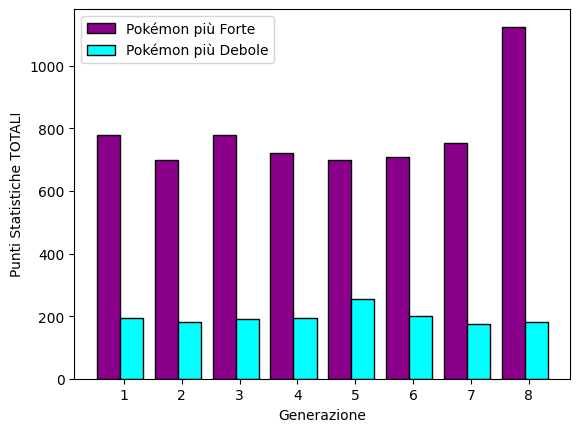

In [29]:
from itertools import chain
sorted_by_gen_and_total_points = filtered_pokemon_data.sort_values(by=['generation', 'total_points'], ascending=[True, False])

my_dict = dict((k, 
                [
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['total_points'].head(1).values),
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['total_points'].tail(1).values)
                ]
                ) for k in sorted_by_gen_and_total_points['generation'].unique())

my_labels = dict((k, 
                [
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['name'].head(1).values),
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['name'].tail(1).values)
                ]
                ) for k in sorted_by_gen_and_total_points['generation'].unique())


my_s = pd.Series(my_dict)
my_l = pd.Series(my_labels)

print(my_s)
temp_b = []
temp_w = []
temp_b_l = []
temp_w_l = []
best1 = [temp_b + [my_s[i][0]] for i in range(1, 9)]
worst1 = [temp_w + [my_s[i][1]] for i in range(1, 9)]
best_labels = [temp_b_l + [my_l[i][0]] for i in range(1, 9)]
worst_labels = [temp_w_l + [my_l[i][1]] for i in range(1, 9)]

# chained_best_labels = chain(list(best_labels))
# chained_worst_labels = chain(list(worst_labels))

best_label_unpacked = [best_labels[i][0] for i in range(len(best_labels))]
worst_label_unpacked = [worst_labels[i][0] for i in range(len(worst_labels))]


# -----GROUPED BAR CHART-----

# GUARDATI COME FUNZIONA QUESTO E METTI LE LABEL
# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')






col_width = 0.4
# prima barra è l'asse x (con le generazioni)
bar1 = np.arange(len(best1))+1
# da dove parte la barra 2 --> sommi alla posizione della colonna (1) la larghezza della colonna (1)
# posizione dove disegnare la colonna 2
bar2 = [i + col_width for i in bar1]


plt.bar(bar1, [best1[i][0] for i in range(len(best1))], col_width,
        label='Pokémon più GRANDI', color='darkmagenta', edgecolor='black')
plt.bar(bar2, [worst1[i][0] for i in range(len(best1))], col_width,
        label='Pokémon più PICCOLO', color='aqua', edgecolor='black')
# serve a dare un offset ai numeri nell'asse x
plt.xticks(bar1 + col_width/2.1, bar1)
plt.xlabel("Generazione")
plt.ylabel("Punti Statistiche TOTALI")
plt.legend(["Pokémon più Forte", "Pokémon più Debole"])
plt.show()

In [30]:
from itertools import chain
list(chain(*best1))

# best1


[[780.0], [700.0], [780.0], [720.0], [700.0], [708.0], [754.0], [1125.0]]

##### Tutti i tentativi fatti per rendere parametrizzato il grafico

In [25]:
# ---------------------------
# ---------------------------
# ---------------------------
# ---------------------------
# TUTTI I TRY FATTI

# Non era molto conveniente e per niente pythonico
# only_gen_1 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 1]
# only_gen_2 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 2]
# only_gen_3 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 3]
# only_gen_4 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 4]
# only_gen_5 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 5]
# only_gen_6 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 6]
# only_gen_7 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 7]
# only_gen_8 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 8]

# l_1 = list(only_gen_1['total_points'].head(1).values)
# l_2 = list(only_gen_2['total_points'].head(1).values)
# l_3 = list(only_gen_3['total_points'].head(1).values)
# l_4 = list(only_gen_4['total_points'].head(1).values)
# l_5 = list(only_gen_5['total_points'].head(1).values)
# l_6 = list(only_gen_6['total_points'].head(1).values)
# l_7 = list(only_gen_7['total_points'].head(1).values)
# l_8 = list(only_gen_8['total_points'].head(1).values)

# w_1 = list(only_gen_1['total_points'].tail(1).values)
# w_2 = list(only_gen_2['total_points'].tail(1).values)
# w_3 = list(only_gen_3['total_points'].tail(1).values)
# w_4 = list(only_gen_4['total_points'].tail(1).values)
# w_5 = list(only_gen_5['total_points'].tail(1).values)
# w_6 = list(only_gen_6['total_points'].tail(1).values)
# w_7 = list(only_gen_7['total_points'].tail(1).values)
# w_8 = list(only_gen_8['total_points'].tail(1).values)


# best_worst = pd.DataFrame
# a = list(my_dict.values()[i][0])
# print(list(my_dict.values()))
# print(list(my_dict.values())[1][0])
# best = [my_s[1][0], my_s[2][0], my_s[3][0],my_s[4][0], my_s[5][0], my_s[6][0], my_s[7][0], my_s[8][0]]
# for i in range(my_s.index):
#     best = best + [my_s[i][0]]
# best = [
#     my_s[1][0], my_s[2][0], my_s[3][0], my_s[4][0],
#     my_s[5][0], my_s[6][0], my_s[7][0], my_s[8][0]
# ]
# worst = [
#     my_s[1][1], my_s[2][1], my_s[3][1], my_s[4][1],
#     my_s[5][1], my_s[6][1], my_s[7][1], my_s[8][1]
# ]
# best_v = best.astype(int)
# worst_v = worst.astype(int)
#
# TOTALE FALLIMENTO DI RENDERE LE COSE PIU' PYTHONICHE

# df_gens = pd.concat([only_gen_1, only_gen_2], axis=0)
#
# df_gens

# best_gen_1 = only_gen_1.head(1)
# worst_gen_1 = only_gen_1.tail(1)

# dobbiamo generare per ogni generazione una variabile "only_gen_<numero-gen>


# altro generatore per prendere per ogni generazione il best e il worst
# concatenare
# df_worst_best = pd.DataFrame
# [df_worst_best.map(dict(enumerate(only_gen_1.head(1), only_gen_1.tail(1)))) if sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation']] == i else None for i in range(1,9)]

# pd1 = pd.DataFrame
# pd1.apply(pd.concat([best_gen_1, worst_gen_1]))

# pd1 = pd.join([only_gen_1[['name', 'total_points']].iloc[0],only_gen_1[['name', 'total_points']].iloc[-1]])
#
# best_worst = pd.concat([pd1])
# best_worst
#
# FINE FALLIMENTO TOTALE


In [26]:
sorted_by_gen_and_total_points

,key_0,pokedex_number,name,date_published,generation,status,type_number,type_1,type_2,height_m,...,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male,Experience to level 100
189,189,150,Mega Mewtwo X,1996,1,Legendary,2,Psychic,Fighting,2.3,...,106.0,190.0,100.0,154.0,100.0,130.0,3.0,351.0,NaN,1250000
190,190,150,Mega Mewtwo Y,1996,1,Legendary,1,Psychic,NaN,1.5,...,106.0,150.0,70.0,194.0,120.0,140.0,3.0,351.0,NaN,1250000
188,188,150,Mewtwo,1996,1,Legendary,1,Psychic,NaN,2.0,...,106.0,110.0,90.0,154.0,90.0,130.0,3.0,306.0,NaN,1250000
166,166,130,Mega Gyarados,1996,1,Normal,2,Water,Dark,6.5,...,95.0,155.0,109.0,70.0,130.0,81.0,45.0,224.0,50.0,1250000
7,7,6,Mega Charizard X,1996,1,Normal,2,Fire,Dragon,1.7,...,78.0,130.0,111.0,130.0,85.0,100.0,45.0,285.0,87.5,1059860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,957,827,Nickit,2019,8,Normal,1,Dark,NaN,0.6,...,40.0,28.0,28.0,47.0,52.0,50.0,NaN,NaN,NaN,1000000
978,978,848,Toxel,2019,8,Normal,2,Electric,Poison,0.4,...,40.0,38.0,35.0,54.0,35.0,40.0,NaN,NaN,NaN,1000000
967,967,837,Rolycoly,2019,8,Normal,1,Rock,NaN,0.3,...,30.0,40.0,50.0,40.0,50.0,30.0,NaN,NaN,NaN,600000
1003,1003,872,Snom,2019,8,Normal,2,Ice,Bug,0.3,...,30.0,25.0,35.0,45.0,30.0,20.0,NaN,NaN,NaN,1250000


In [27]:
filtered_pokemon_data

,key_0,pokedex_number,name,date_published,generation,status,type_number,type_1,type_2,height_m,...,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male,Experience to level 100
0,0,1,Bulbasaur,1996,1,Normal,2,Grass,Poison,0.7,...,45.0,49.0,49.0,65.0,65.0,45.0,45.0,64.0,87.5,1059860
1,1,2,Ivysaur,1996,1,Normal,2,Grass,Poison,1.0,...,60.0,62.0,63.0,80.0,80.0,60.0,45.0,142.0,87.5,1059860
2,2,3,Venusaur,1996,1,Normal,2,Grass,Poison,2.0,...,80.0,82.0,83.0,100.0,100.0,80.0,45.0,236.0,87.5,1059860
3,3,3,Mega Venusaur,1996,1,Normal,2,Grass,Poison,2.4,...,80.0,100.0,123.0,122.0,120.0,80.0,45.0,281.0,87.5,1059860
4,4,4,Charmander,1996,1,Normal,1,Fire,NaN,0.6,...,39.0,52.0,43.0,60.0,50.0,65.0,45.0,62.0,87.5,1059860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1023,888,Zacian Hero of Many Battles,2019,8,Legendary,1,Fairy,NaN,2.8,...,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,1250000
1024,1024,889,Zamazenta Crowned Shield,2019,8,Legendary,2,Fighting,Steel,2.9,...,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN,1250000
1025,1025,889,Zamazenta Hero of Many Battles,2019,8,Legendary,1,Fighting,NaN,2.9,...,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,1250000
1026,1026,890,Eternatus,2019,8,Legendary,2,Poison,Dragon,20.0,...,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,1250000
